In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\election_results_2024.csv")

In [3]:
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [4]:
df.shape

(543, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


In [6]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [7]:
df['Margin'] = df['Margin'].replace('-','NaN')

In [8]:
df['Margin'].dropna()

0      329991
1       48282
2       49036
3      281794
4      306559
        ...  
538     81648
539    364422
540    199013
541     94473
542     46188
Name: Margin, Length: 543, dtype: object

In [9]:
dash = (df['Margin'] == 'NaN').sum()

In [10]:
dash

1

In [11]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [12]:
df.dropna()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
...,...,...,...,...,...,...,...,...
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared


In [13]:
df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    1
Trailing Party        1
Margin                0
Status                0
dtype: int64

In [14]:
df = df.dropna(subset=['Trailing Candidate'])

In [15]:

df.isnull().sum()

Constituency          0
Const. No.            0
Leading Candidate     0
Leading Party         0
Trailing Candidate    0
Trailing Party        0
Margin                0
Status                0
dtype: int64

## Total number of seats won by each party

In [16]:
df.head(2)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared


In [17]:
counts_leading = df["Leading Party"].value_counts()

In [18]:
counts_leading

Bharatiya Janata Party                                      239
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Shiv Sena                                                     7
Independent                                                   7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Indian Union Muslim League              

In [19]:
df["Leading Party"].info()

<class 'pandas.core.series.Series'>
Int64Index: 542 entries, 0 to 542
Series name: Leading Party
Non-Null Count  Dtype 
--------------  ----- 
542 non-null    object
dtypes: object(1)
memory usage: 8.5+ KB


In [20]:
# converting margin datatype into int
df['Margin'] = df['Margin'].astype(int)

In [21]:
df['Margin'].info()

<class 'pandas.core.series.Series'>
Int64Index: 542 entries, 0 to 542
Series name: Margin
Non-Null Count  Dtype
--------------  -----
542 non-null    int32
dtypes: int32(1)
memory usage: 6.4 KB


In [22]:
#party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

In [23]:
#party_votes

In [24]:
df.head(2)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared


In [25]:
# Get the row with the highest margin
highest_margin = df.loc[df['Margin'].idxmax()]

In [26]:

highest_margin

Constituency                               INDORE
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                    1175092
Status                            Result Declared
Name: 221, dtype: object

In [27]:
lowest_margin = df.loc[df['Margin'].idxmin()]
lowest_margin

Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                   48
Status                                      Result Declared
Name: 357, dtype: object

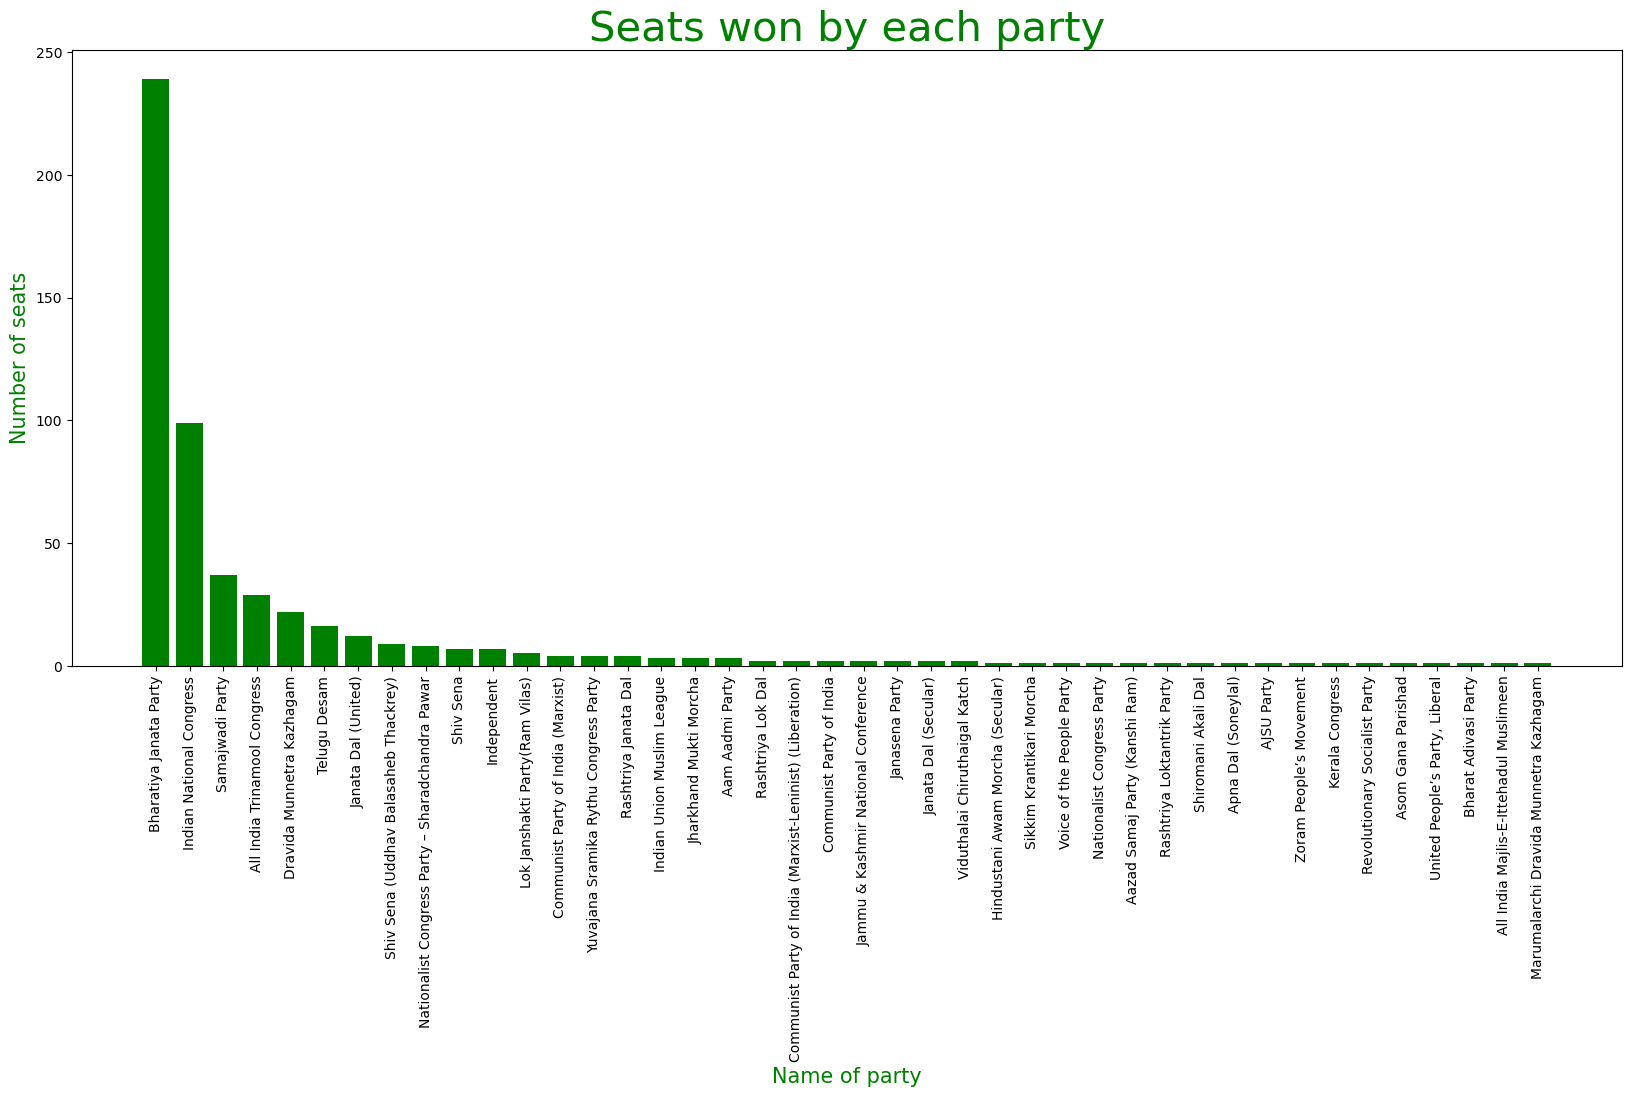

In [28]:
plt.figure(figsize=(20,8))
plt.bar(counts_leading.index,counts_leading.values,color='green')
plt.title("Seats won by each party",size=30,color='green')
plt.xlabel('Name of party',size=15,color='green')
plt.ylabel("Number of seats",size=15,color='green')
plt.xticks(rotation=90)
plt.show()

## get the votes for Rahul Gandhi, Narendra Modi and Amit Shah

In [29]:
votes_rahul = df[df['Leading Candidate']=='RAHUL GANDHI']
if not votes_rahul.empty:
   print(votes_rahul[['Margin']])
else:
    print("no data")

     Margin
430  390030
539  364422


In [30]:
votes_narendra = df[df['Leading Candidate']=='NARENDRA MODI']
if not votes_narendra.empty:
    print(votes_narendra[['Margin']])
else:
    print("no data")

     Margin
533  152513


In [31]:
votes_amit = df[df['Leading Candidate']=='AMIT SHAH']
if not votes_amit.empty:
    print(votes_amit[['Margin']])
else:
    print("no data")

     Margin
186  744716


In [32]:
# getting constituency names for all three
rahul_entries = votes_rahul['Constituency']
rahul_entries

430    Rae Bareli
539       Wayanad
Name: Constituency, dtype: object

In [33]:
narendra_entries = votes_narendra['Constituency']
narendra_entries

533    Varanasi
Name: Constituency, dtype: object

In [34]:
amit_entries = votes_amit['Constituency']
amit_entries

186    Gandhinagar
Name: Constituency, dtype: object

## Comparison of votes between Rahul Gandhi, Narendra Modi and Amit Shah

In [35]:
# making a dataframe where only selected candidates will be there
candidates = ['RAHUL GANDHI','NARENDRA MODI','AMIT SHAH']
filtered_df = df[df['Leading Candidate'].isin(candidates)]

In [36]:
party_votes = filtered_df.groupby(['Leading Candidate'])['Margin'].count().reset_index()

In [37]:
party_votes

,Leading Candidate,Margin
0,AMIT SHAH,1
1,NARENDRA MODI,1
2,RAHUL GANDHI,2


C:\Users\user\AppData\Local\Temp\ipykernel_3968\574481184.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Label'] = filtered_df['Leading Candidate'] + ' (' + filtered_df['Constituency'] + ')'


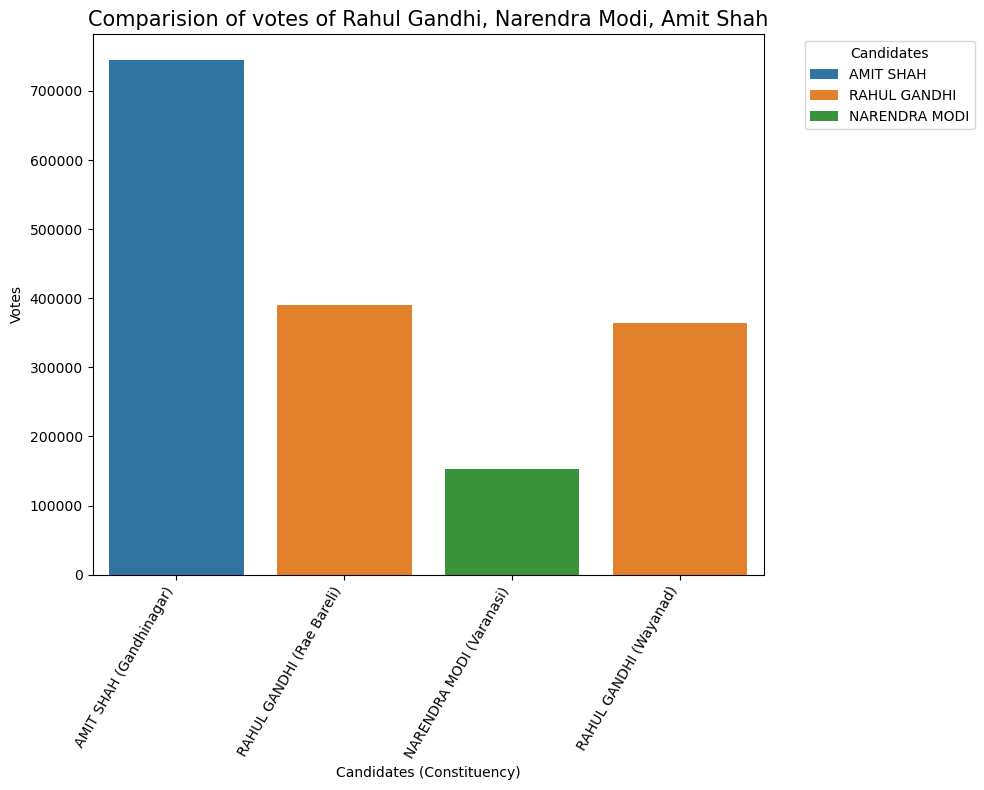

In [38]:
# Filter the DataFrame to include only the specified candidates
candidates = ['RAHUL GANDHI', 'NARENDRA MODI', 'AMIT SHAH']
filtered_df = df[df['Leading Candidate'].isin(candidates)]

# Generate unique labels for each entry to ensure all are plotted
filtered_df['Label'] = filtered_df['Leading Candidate'] + ' (' + filtered_df['Constituency'] + ')'

# Plot using seaborn to easily add a legend
plt.figure(figsize=(10, 8))
sns.barplot(x=filtered_df['Label'], y=filtered_df['Margin'], hue=filtered_df['Leading Candidate'], dodge=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60, ha='right')

# Add labels and title
plt.xlabel('Candidates (Constituency)')
plt.ylabel('Votes',size=10)
plt.title('Comparision of votes of Rahul Gandhi, Narendra Modi, Amit Shah',size=15)

# Add legend outside the plot
plt.legend(title='Candidates', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Highest and Lowest Victory Candidate

In [39]:
highest_victory = df.loc[df['Margin'].idxmax()]

In [40]:
highest_victory

Constituency                               INDORE
Const. No.                                     26
Leading Candidate                 SHANKAR LALWANI
Leading Party              Bharatiya Janata Party
Trailing Candidate    SANJAY S/O LAKSHMAN SOLANKI
Trailing Party                Bahujan Samaj Party
Margin                                    1175092
Status                            Result Declared
Name: 221, dtype: object

In [41]:
lowest_victory = df.loc[df['Margin'].idxmin()]

In [42]:
lowest_victory

Constituency                              Mumbai North West
Const. No.                                               27
Leading Candidate                  RAVINDRA DATTARAM WAIKAR
Leading Party                                     Shiv Sena
Trailing Candidate                    AMOL GAJANAN KIRTIKAR
Trailing Party        Shiv Sena (Uddhav Balasaheb Thackrey)
Margin                                                   48
Status                                      Result Declared
Name: 357, dtype: object

In [43]:
victory_df = pd.DataFrame([highest_victory,lowest_victory])

In [44]:
victory_df

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
221,INDORE,26,SHANKAR LALWANI,Bharatiya Janata Party,SANJAY S/O LAKSHMAN SOLANKI,Bahujan Samaj Party,1175092,Result Declared
357,Mumbai North West,27,RAVINDRA DATTARAM WAIKAR,Shiv Sena,AMOL GAJANAN KIRTIKAR,Shiv Sena (Uddhav Balasaheb Thackrey),48,Result Declared


In [45]:
victory_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 221 to 357
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        2 non-null      object
 1   Const. No.          2 non-null      int64 
 2   Leading Candidate   2 non-null      object
 3   Leading Party       2 non-null      object
 4   Trailing Candidate  2 non-null      object
 5   Trailing Party      2 non-null      object
 6   Margin              2 non-null      int32 
 7   Status              2 non-null      object
dtypes: int32(1), int64(1), object(6)
memory usage: 136.0+ bytes


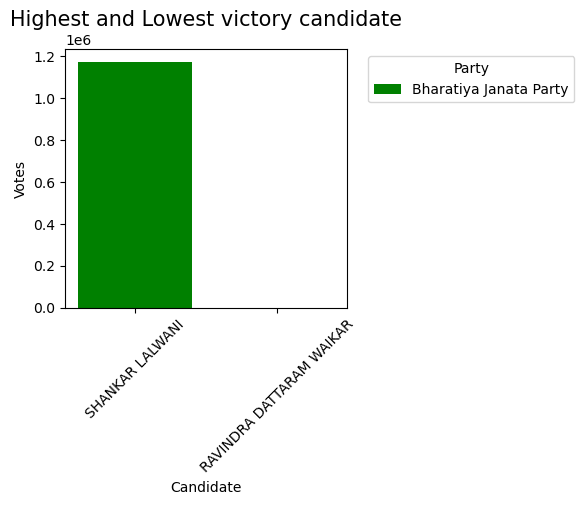

In [46]:
plt.figure(figsize=(6,5))
plt.bar(victory_df['Leading Candidate'], victory_df["Margin"],color=['green','red'])
plt.xlabel("Candidate")
plt.ylabel("Votes")
plt.title("Highest and Lowest victory candidate",size=15)
plt.xticks(rotation=45)
# Add legend outside the plot
plt.legend(['Bharatiya Janata Party', 'Shiv Sena'], title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

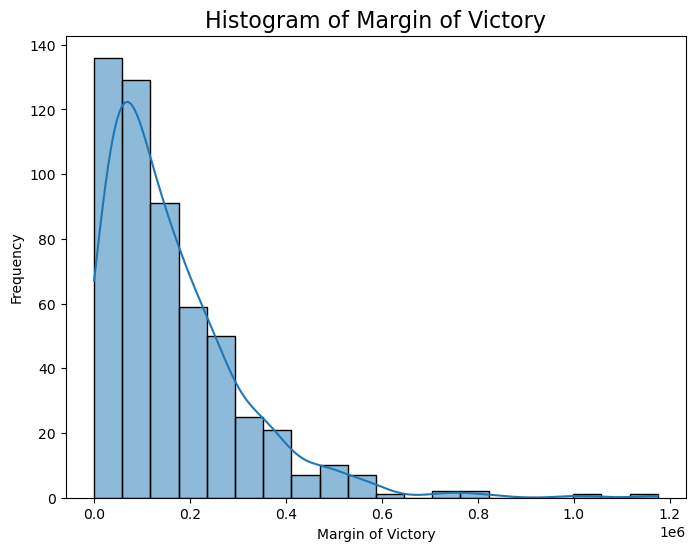

In [47]:
plt.figure(figsize=(8,6))
sns.histplot(df['Margin'],bins=20,kde=True)
plt.title("Histogram of Margin of Victory",size=16)
plt.xlabel("Margin of Victory")
plt.ylabel("Frequency")

### Votes distribution by party

In [48]:
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
party_votes

Leading Party
Bharatiya Janata Party                                      46081536
Indian National Congress                                    13005922
Dravida Munnetra Kazhagam                                    5081582
All India Trinamool Congress                                 4910963
Telugu Desam                                                 3660927
Samajwadi Party                                              2869566
Janata Dal (United)                                          1386413
Shiv Sena (Uddhav Balasaheb Thackrey)                        1015430
Communist Party of India (Marxist)                            746237
Lok Janshakti Party(Ram Vilas)                                720603
Nationalist Congress Party – Sharadchandra Pawar              716571
Indian Union Muslim League                                    702660
Shiv Sena                                                     700373
Independent                                                   629302
Jammu & Kashmir Nati

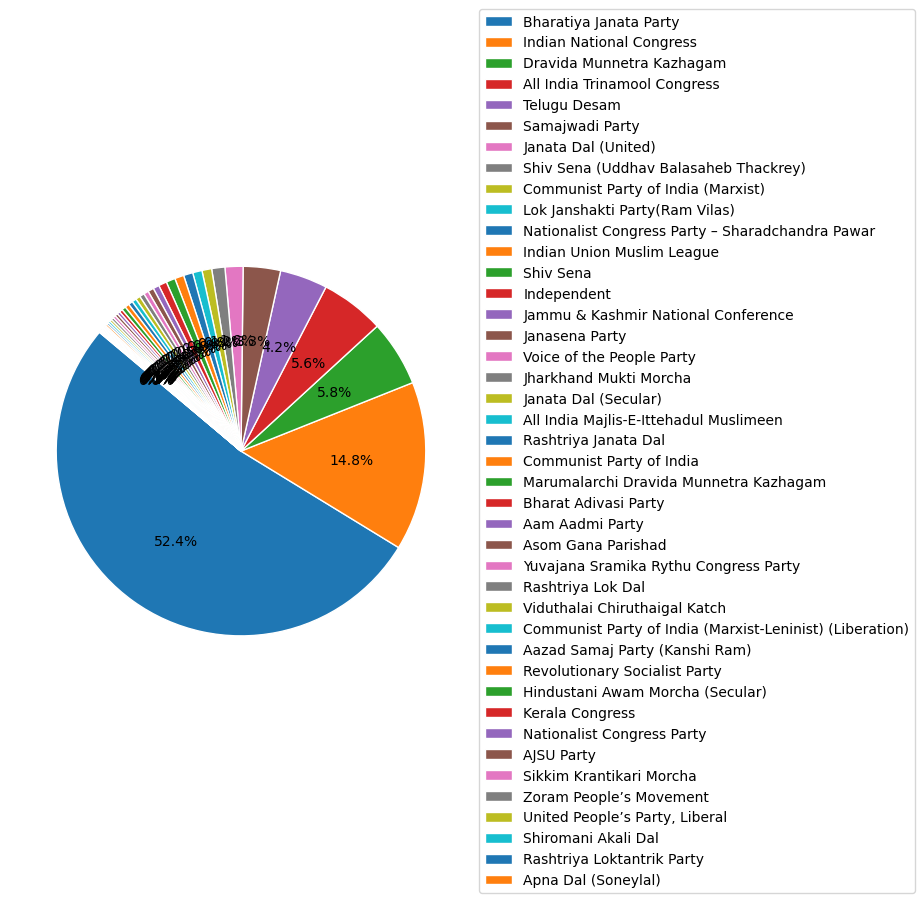

In [49]:
plt.figure(figsize=(8,6))
plt.pie(
    party_votes,# Data for the pie chart
    
    labels=None,            # Labels for each slice
    autopct='%1.1f%%',
    
    startangle=140,
    wedgeprops=dict(edgecolor='w'))
plt.legend(party_votes.index,loc='center left', bbox_to_anchor=(1,0.5),fontsize='medium')

### Top 10 Trailing Party by Votes

In [50]:
top_trailing_parties = df.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)

In [51]:
top10_trailing_parties = top_trailing_parties.head(10)
top10_trailing_parties

Trailing Party
Indian National Congress                    35872203
Bharatiya Janata Party                      18160854
All India Anna Dravida Munnetra Kazhagam     5519091
Yuvajana Sramika Rythu Congress Party        4926068
Communist Party of India (Marxist)           2622123
Samajwadi Party                              2365143
Biju Janata Dal                              2236289
Rashtriya Janata Dal                         1962693
Bahujan Samaj Party                          1716321
Aam Aadmi Party                              1277670
Name: Margin, dtype: int32

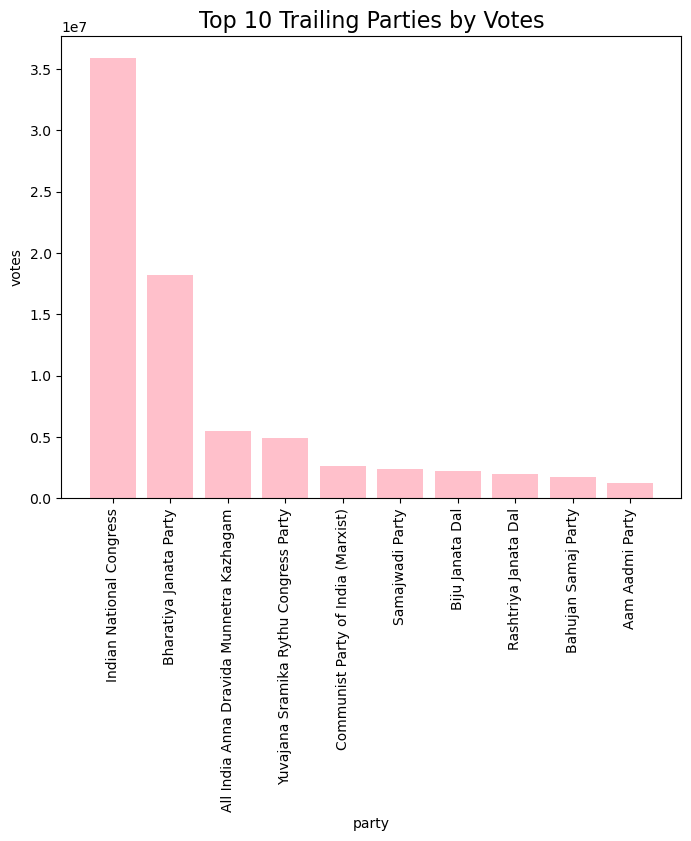

In [52]:
plt.figure(figsize=(8,6))
plt.bar(top10_trailing_parties.index,top10_trailing_parties.values,color='pink')
plt.title("Top 10 Trailing Parties by Votes",size=16)
plt.xlabel("party")
plt.ylabel("votes")
plt.xticks(rotation=90)
plt.show()

### Top 10 Trailing Parties by Seat

In [53]:
trailing_party_seats = df['Trailing Party'].value_counts()

In [54]:
trailing_party_seats

Indian National Congress                                    167
Bharatiya Janata Party                                      153
All India Anna Dravida Munnetra Kazhagam                     24
Samajwadi Party                                              24
Biju Janata Dal                                              21
Yuvajana Sramika Rythu Congress Party                        21
Rashtriya Janata Dal                                         18
Communist Party of India (Marxist)                           17
All India Trinamool Congress                                 13
Aam Aadmi Party                                              13
Shiv Sena (Uddhav Balasaheb Thackrey)                        10
Shiv Sena                                                     8
Independent                                                   5
Communist Party of India                                      4
Janata Dal (United)                                           4
Nationalist Congress Party – Sharadchand

In [55]:
top10_trailing_party_seats = trailing_party_seats.head(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Samajwadi Party'),
  Text(4, 0, 'Biju Janata Dal'),
  Text(5, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(6, 0, 'Rashtriya Janata Dal'),
  Text(7, 0, 'Communist Party of India (Marxist)'),
  Text(8, 0, 'All India Trinamool Congress'),
  Text(9, 0, 'Aam Aadmi Party')])

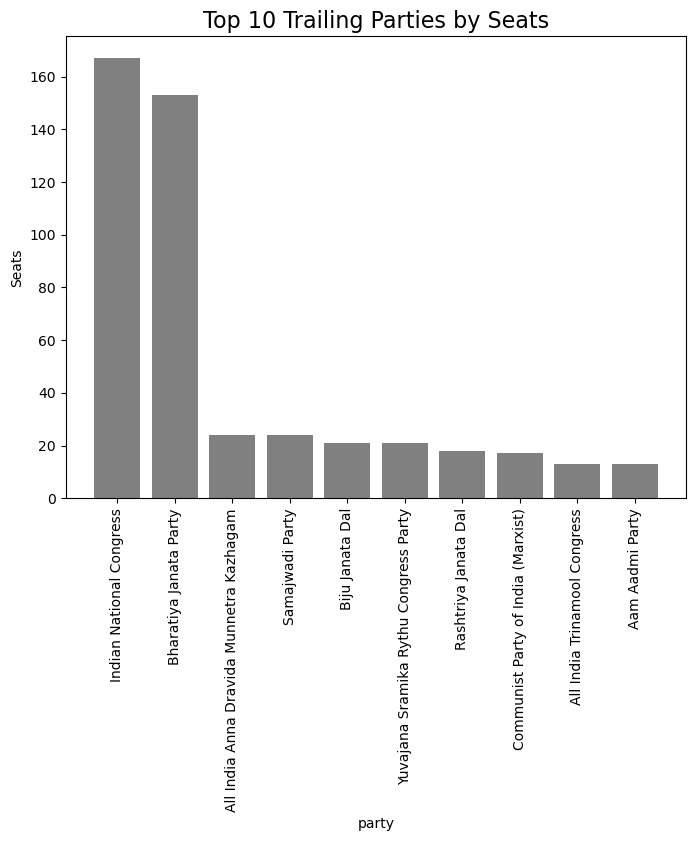

In [56]:
plt.figure(figsize=(8,6))
plt.bar(top10_trailing_party_seats.index,top10_trailing_party_seats.values,color='grey')
plt.xlabel("party")
plt.ylabel("Seats")
plt.title("Top 10 Trailing Parties by Seats",size=16)
plt.xticks(rotation=90)

### Top 10 Leading Parties by Votes

In [57]:
leading_parties = df.groupby("Leading Party")['Margin'].sum().sort_values(ascending=False)

In [58]:
top10_leading_parties = leading_parties.head(10)

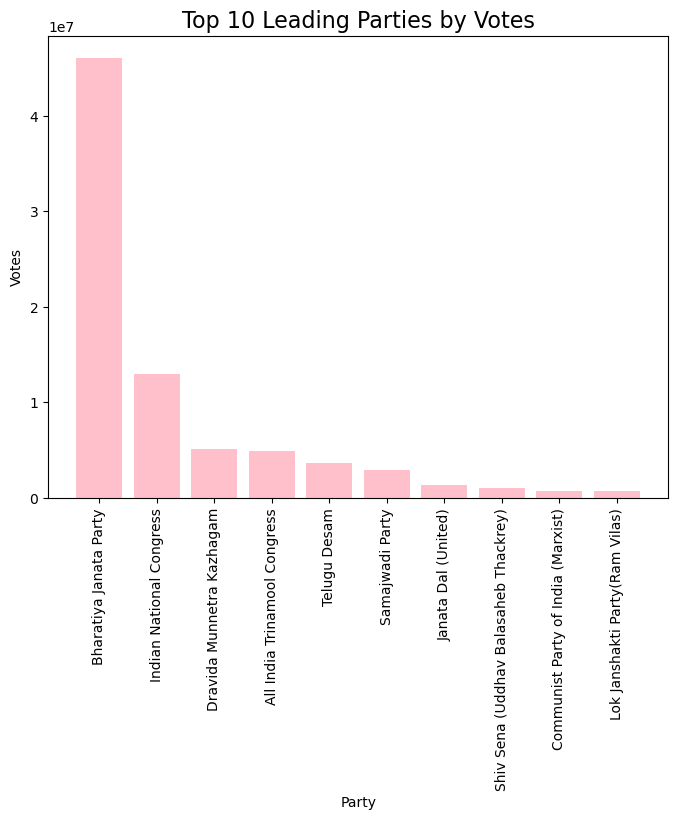

In [59]:
plt.figure(figsize=(8,6))
plt.bar(top10_leading_parties.index,top10_leading_parties.values,color='pink')
plt.title("Top 10 Leading Parties by Votes",size=16)
plt.xlabel("Party")
plt.ylabel("Votes")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

### Top 10 leading parties by seat

In [60]:
leading_parties = df['Leading Party'].value_counts().sort_values(ascending=False)

In [61]:
top10_leading_parties = leading_parties.head(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Bharatiya Janata Party'),
  Text(1, 0, 'Indian National Congress'),
  Text(2, 0, 'Samajwadi Party'),
  Text(3, 0, 'All India Trinamool Congress'),
  Text(4, 0, 'Dravida Munnetra Kazhagam'),
  Text(5, 0, 'Telugu Desam'),
  Text(6, 0, 'Janata Dal (United)'),
  Text(7, 0, 'Shiv Sena (Uddhav Balasaheb Thackrey)'),
  Text(8, 0, 'Nationalist Congress Party – Sharadchandra Pawar'),
  Text(9, 0, 'Independent')])

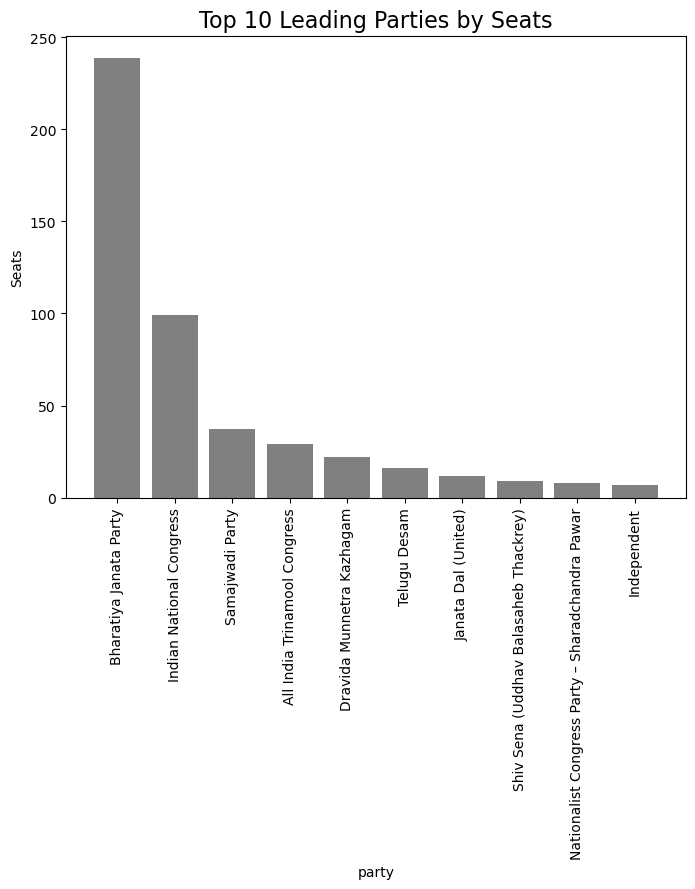

In [62]:
plt.figure(figsize=(8,6))
plt.bar(top10_leading_parties.index,top10_leading_parties.values,color='grey')
plt.title("Top 10 Leading Parties by Seats",size=16)
plt.xlabel("party")
plt.ylabel("Seats")
plt.xticks(rotation=90)

# DASHBOARD

In [63]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output


C:\Users\user\AppData\Local\Temp\ipykernel_3968\3613467664.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\user\AppData\Local\Temp\ipykernel_3968\3613467664.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [136]:
app = dash.Dash("Loksabha_election_dash")

app.layout = html.Div(children=[
    html.H1("Loksabha 2024 Election Analysis", style={'textAlign': 'center', 'color': '#503D36', 'font-size': 40}),
    html.Div([
        #"Year: ",
        dcc.Input(id='Year', value='2024', type='number', style={'height': '30px', 'font-size': 20})
    ], style={'font-size': 20}),
    html.Br(),
    html.Br(),
    html.Div([
        dcc.Graph(id='plot1', style={'width': '100%', 'height': '800px', 'display': 'inline-block'}),
        dcc.Graph(id='plot2', style={'width': '70%', 'height': '400px', 'display': 'inline-block'}),
        dcc.Graph(id='plot3', style={'width': '60%', 'height': '400px', 'display': 'inline-block'}),
        dcc.Graph(id='plot4', style={'width': '100%', 'height': '800px', 'display': 'inline-block'}),
        dcc.Graph(id='plot5', style={'width': '50%', 'height': '600px', 'display': 'inline-block'}),
        dcc.Graph(id='plot6', style={'width': '50%', 'height': '600px', 'display': 'inline-block'}),
        dcc.Graph(id='plot7', style={'width': '50%', 'height': '600px', 'display': 'inline-block'}),
        dcc.Graph(id='plot8', style={'width': '50%', 'height': '600px', 'display': 'inline-block'}),
    ])
])

@app.callback(
    Output(component_id='plot1', component_property='figure'),
    Output(component_id='plot2', component_property='figure'),
    Output(component_id='plot3', component_property='figure'),
    Output(component_id='plot4', component_property='figure'),
    Output(component_id='plot5', component_property='figure'),
    Output(component_id='plot6', component_property='figure'),
    Output(component_id='plot7', component_property='figure'),
    Output(component_id='plot8', component_property='figure'),
    Input(component_id='Year', component_property='value')
)
def get_graphs(year):
    highest_margin = df.loc[df['Margin'].idxmax()]
    lowest_margin = df.loc[df['Margin'].idxmin()]
    
    counts_leading = df["Leading Party"].value_counts()
    
    seats_won = px.bar(x=counts_leading.index, y=counts_leading.values, labels={'x': 'Party', 'y': 'Seats Won'}, color_discrete_sequence=['green'],title='Seats won by each party')
    
    candidates = ['RAHUL GANDHI', 'NARENDRA MODI', 'AMIT SHAH']
    filtered_df = df[df['Leading Candidate'].isin(candidates)]

    # Generate unique labels for each entry to ensure all are plotted
    filtered_df['Label'] = filtered_df['Leading Candidate'] + ' (' + filtered_df['Constituency'] + ')'

    votes_comparison = px.line(x=filtered_df['Label'], y=filtered_df['Margin'],labels={'x':'Candidate','y':'Votes'},title='Votes Comparison of Rahul Gandhi, Narendra Modi, Amit Shah')


    highest_victory = df.loc[df['Margin'].idxmax()]
    lowest_victory = df.loc[df['Margin'].idxmin()]
    victory_df = pd.DataFrame([highest_victory,lowest_victory])
    victory = px.scatter(x=victory_df['Leading Candidate'], y=victory_df["Margin"],labels={'x':'Candidate','y':'Margin'},title='Highest and Lowest Victory Candidate',color_discrete_sequence=['green','red'])
    
    
    party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
    votes_distribution = px.scatter(x=party_votes.index,y=party_votes.values,labels={'x':'Party','y':'Votes'},color_discrete_sequence=['red'],title='Votes Distribution By Party')
    
    
    
    top_trailing_parties = df.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
    top10_trailing_parties = top_trailing_parties.head(10)
    trailing_parties_votes = px.line(x=top10_trailing_parties.index,y=top10_trailing_parties.values,labels={'x':'Party','y':'Votes'},color_discrete_sequence=['purple'],title='Top 10 Trailing Parties By Votes')
    
    
    trailing_party_seats = df['Trailing Party'].value_counts()
    top10_trailing_party_seats = trailing_party_seats.head(10)
    trailing_party_seats=px.line(x=top10_trailing_party_seats.index,y=top10_trailing_party_seats.values,color_discrete_sequence=['yellow'],labels={'x':'party','y':'Seat'},title='Top 10 Trailing Parties By Seat')
    
    
    
    leading_parties = df.groupby("Leading Party")['Margin'].sum().sort_values(ascending=False)
    top10_leading_parties = leading_parties.head(10)
    leading_party_votes = px.bar(x=top10_leading_parties.index,y=top10_leading_parties.values,color_discrete_sequence=['pink'],labels={'x':'party','y':'Votes'},title='Top 10 Leading Parties By Votes')
    
    
    leading_parties = df['Leading Party'].value_counts().sort_values(ascending=False)
    top10_leading_parties = leading_parties.head(10)
    leading_party_seat = px.bar(x=top10_leading_parties.index,y=top10_leading_parties.values,color_discrete_sequence=['orange'],labels={'x':'party','y':'Seat'},title='Top 10 Leading Parties By Seat')
    
    return seats_won, votes_comparison, victory, votes_distribution, trailing_parties_votes, trailing_party_seats,leading_party_votes,leading_party_seat



if __name__ == '__main__':
    app.run_server(debug=True)
    


C:\Users\user\AppData\Local\Temp\ipykernel_3968\721609.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
#stop server
#netstat -ano | findstr :8050 (the port number)
#taskkill /F /PID 12017(or whatever the process ID is)

